# Assignment 1: Comparison of Regression Models on Housing Prices in Boston, MA

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (Image Credit: Boston.gov). You will attempt to predict the housing prices in Ames, Iowa. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

**Context of the problem** <br>
The purpose of this project is to create a regression model in order to predict the sale price of a home based on the home's features. The model is expected to be able to learn from the details of a home to create an accurate price prediction; this could be beneficial because home owners because they would have an idea of what range to list their home for sale. Also, people looking to buy a home would have an idea of an acceptable price for a potential home. <br>
To evaluate how accurate the model's predictions are compared to the test set, mean absolute error and root mean squared error will be used, which are common error evaluators for regression models. The data available includes 80 features which include details such as location, size, amount of rooms, age, utilities, year sold, sale price, and more. There are about 1461 data entries. For this task, a random forest regressor algorithm will be used. This project will be made within 10 days. This project was made with the assumption that any user would want a scalar value prediction for the value of a home.

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [147]:
import pandas as pd

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv('train.csv')
  return housing

# Call the function to load your dataset here
housing  = pd.read_csv("train.csv")

In [148]:
#The dataset has 79 actual features and the sale price
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [149]:
#The dataset is 924+ KB
#The dataset has about 1460 entries
#43 features have object types for categorical data.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [150]:
nulls = housing.isnull().sum()
nulls = nulls[nulls!=0]
print("Features with missing values:")
print(nulls)

Features with missing values:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [151]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


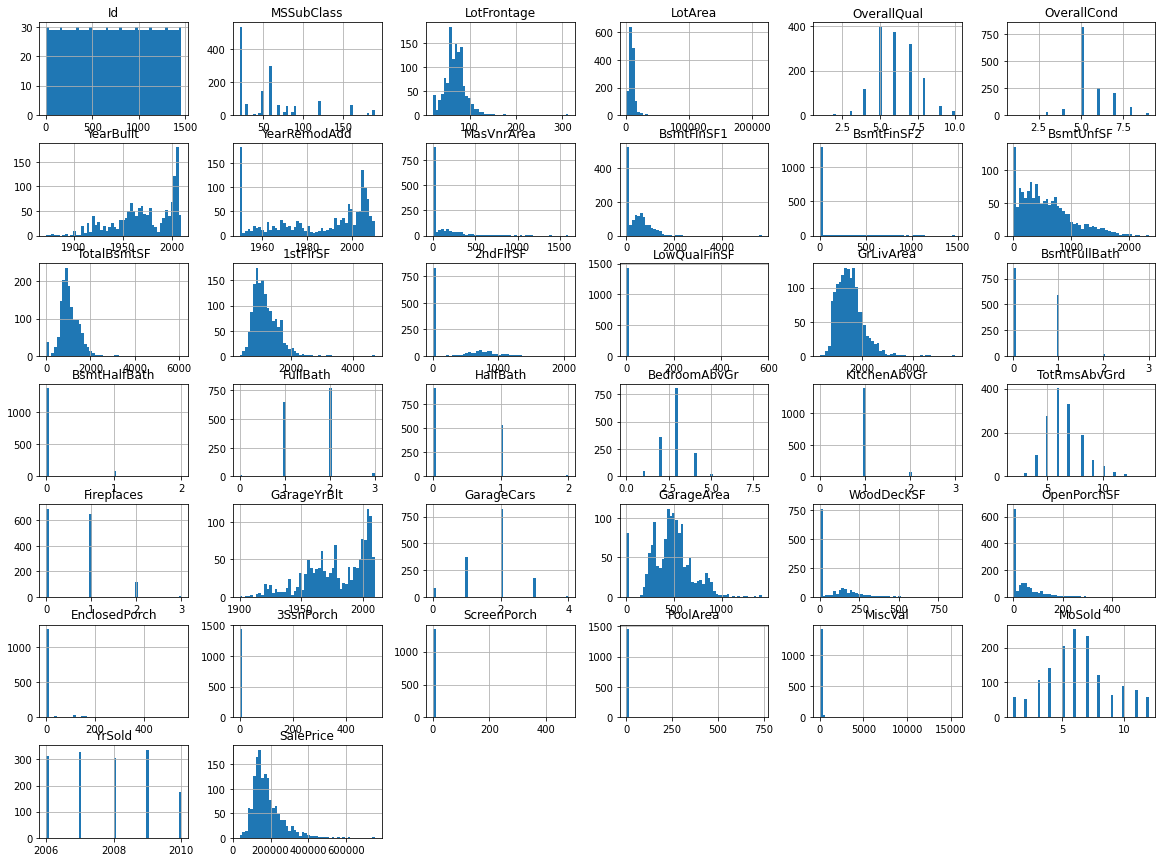

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [153]:
# Your code to visualize the data here
correlation = housing.corr()
correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [154]:
#Correlations to sale price sorted
correlation['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

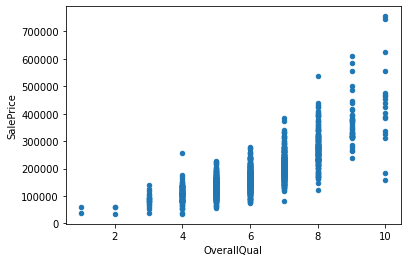

In [155]:
housing.plot(kind="scatter", x="OverallQual", y="SalePrice")

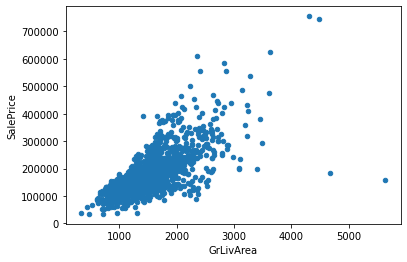

In [156]:
housing.plot(kind="scatter", x="GrLivArea", y="SalePrice")

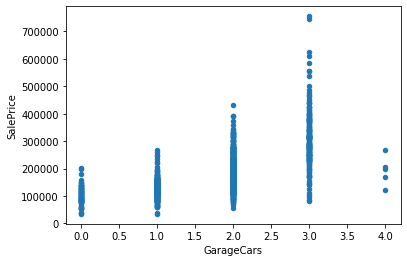

In [157]:
housing.plot(kind="scatter", x="GarageCars", y="SalePrice")

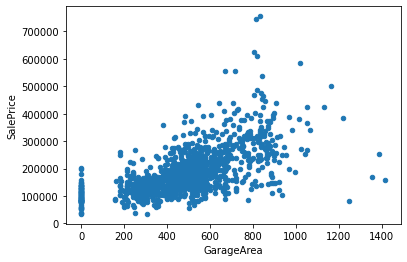

In [158]:
housing.plot(kind="scatter", x="GarageArea", y="SalePrice")

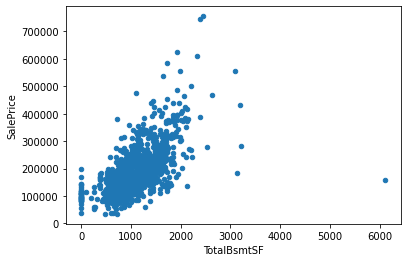

In [159]:
housing.plot(kind="scatter", x="TotalBsmtSF", y="SalePrice")

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and set, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [160]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, housing_test_set = train_test_split(housing, test_size=0.2, random_state=42)
#housing_train_set, housing_validation_set = train_test_split(train_set, test_size=0.2, random_state=42)

In [161]:
housing_train_set, housing_validation_set = train_test_split(train_set, test_size=0.2, random_state=42)

In [162]:
#Create labels for each set
train_labels = housing_train_set['SalePrice']
validation_labels = housing_validation_set['SalePrice']
test_labels = housing_test_set['SalePrice']

#Drop labels in each set
housing_train_set.drop(['SalePrice'], axis = 1, inplace = True)
housing_validation_set.drop(['SalePrice'], axis = 1, inplace = True)
housing_test_set.drop(['SalePrice'], axis = 1, inplace = True)

In [163]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [164]:
housing_num_tr = housing_train_set._get_numeric_data()
numeric_columns = housing_num_tr.columns

In [165]:
# imputer.fit(housing_num)

In [166]:
# X = imputer.transform(housing_num)

In [167]:
# housing_fixedNum = pd.DataFrame(X, columns=housing_num.columns,
#                           index=housing.index)

In [168]:
# housing_fixedNum.head()

In [169]:
housing_cat_tr = housing_train_set.drop(numeric_columns, axis = 1)

In [170]:
# housing_cat.head()

In [171]:
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot = housing_cat_1hot.toarray()

In [172]:
# housing_cat_1hot

In [173]:
# housing_cat_1hotdf = pd.DataFrame(housing_cat_1hot)

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [175]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num_tr)
cat_attribs = list(housing_cat_tr)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared_tr = full_pipeline.fit_transform(housing_train_set)
housing_prepared_val = full_pipeline.fit_transform(housing_validation_set)
housing_prepared_test = full_pipeline.fit_transform(housing_test_set)

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [176]:
# Try a few models here
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_tr, train_labels)

LinearRegression()

In [177]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lin_reg, housing_prepared_tr, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Lin Reg Training Scores")
display(np.sqrt(-scores))

scores = cross_val_score(lin_reg, housing_prepared_val, validation_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Lin Reg Validation Scores")
display(np.sqrt(-scores))

scores = cross_val_score(lin_reg, housing_prepared_test, test_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Lin Reg Testing Scores")
display(np.sqrt(-scores))

Lin Reg Training Scores


array([30319.80575844, 64865.50342669, 83766.51380075, 35215.788958  ,
       67551.25760664])

Lin Reg Validation Scores


array([ 727449.80951909,  370362.56783204,  700801.34275039,
       5253711.93951888,  534146.8364901 ])

Lin Reg Testing Scores


array([2.50818737e+15, 4.02552545e+16, 5.56619798e+15, 9.48892213e+17,
       1.81770487e+16])

In [178]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared_tr, train_labels)

DecisionTreeRegressor(random_state=42)

In [179]:
scores = cross_val_score(tree_reg, housing_prepared_tr, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Tree Reg Training Scores")
display(np.sqrt(-scores))

scores = cross_val_score(tree_reg, housing_prepared_val, validation_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Tree Reg Validation Scores")
display(np.sqrt(-scores))

scores = cross_val_score(tree_reg, housing_prepared_test, test_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Tree Reg Testing Scores")
display(np.sqrt(-scores))

Tree Reg Training Scores


array([36985.26347884, 60503.01088561, 37575.96936304, 39474.34502842,
       36055.70657919])

Tree Reg Validation Scores


array([32866.69174233, 40574.96922378, 55005.50606443, 35692.86502036,
       58754.51778097])

Tree Reg Testing Scores


array([66029.1098579 , 57080.72202295, 59375.68452876, 33688.74255491,
       37188.85383233])

In [180]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared_tr, train_labels)

RandomForestRegressor(random_state=42)

In [181]:
scores = cross_val_score(forest_reg, housing_prepared_tr, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Random Forest Reg Training Scores")
display(np.sqrt(-scores))

scores = cross_val_score(forest_reg, housing_prepared_val, validation_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Random Forest Validation Scores")
display(np.sqrt(-scores))

scores = cross_val_score(forest_reg, housing_prepared_test, test_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Random Forest Testing Scores")
display(np.sqrt(-scores))

Random Forest Reg Training Scores


array([28146.88915091, 46864.31064234, 22769.08199062, 28697.81711254,
       26073.56866521])

Random Forest Validation Scores


array([24313.93306409, 29159.03912728, 45136.36858924, 21200.53186927,
       46107.3564337 ])

Random Forest Testing Scores


array([26402.14935885, 36341.00895974, 51314.53789032, 29179.28501832,
       22779.72836809])

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [182]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=79),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared_tr, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f020b1604d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f020af3d090>},
                   random_state=42, scoring='neg_mean_squared_error')

In [183]:
rnd_search.best_params_

{'max_features': 72, 'n_estimators': 189}

In [186]:
forest_reg = RandomForestRegressor(n_estimators=189, max_features = 72, random_state=42)
forest_reg.fit(housing_prepared_tr, train_labels)

RandomForestRegressor(max_features=72, n_estimators=189, random_state=42)

In [187]:
scores = cross_val_score(forest_reg, housing_prepared_tr, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Final Random Forest Reg Training Scores")
display(np.sqrt(-scores))

scores = cross_val_score(forest_reg, housing_prepared_val, validation_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Final Random Forest Validation Scores")
display(np.sqrt(-scores))

scores = cross_val_score(forest_reg, housing_prepared_test, test_labels,
                         scoring="neg_mean_squared_error", cv=5)
print("Final Random Forest Testing Scores")
display(np.sqrt(-scores))

Final Random Forest Reg Training Scores


array([28137.24685508, 44539.20172513, 23052.24030514, 27992.91902514,
       26257.40057284])

Final Random Forest Validation Scores


array([20986.35153211, 25745.88037227, 42576.62951786, 25403.37636047,
       45239.64611782])

Final Random Forest Testing Scores


array([29182.4222638 , 35580.28244673, 56228.87973745, 27389.36977939,
       24483.97974405])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

In [189]:
test_labels.mean()

178839.81164383562

In [192]:
(np.sqrt(-scores)).mean()

34572.98679428226

Within the data used to test the optimized algorithm, the average sale price of a house was 178,839 dollars. The average RMSE from the tests is well below this value; it was 34,572; therefore, we can predict the sale price of a house with moderate accuracy. Most features were used to contribute to this prediction (72 of the 79) and features such as overall quality or general living area had greater importance than other features. To improve the solution, feature engineering could be performed to find create more data or a more complicated algorithm could be tested. However, the random forest regressor in this project was able to adequately create predictions using the given data.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!